- This notebook is to checking the composition concentration impact for the model performance (amphiphile mixture dataset) by using package functions (and plot GP prediction together)


In [1]:
import sys
sys.path.append("../src/models")
sys.path.append("../src")
sys.path.append("../")

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
from utils import *
from Concentration import *

In [4]:
# Get concentration information
file_path='../../data/df_input_update_ori_20240812.csv'
info_path = '../../data/Info.csv'

df_structured = get_data_AL(file_path, info_path)
df_structured.head()

(336, 8)
(336, 15)


/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_input.iloc[:,0:7] = df_input.iloc[:,0:7].applymap(lambda x: np.log1p(x))
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/rdkit/Chem/PandasPatcher.py:132: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,smi1,conc1,smi2,conc2,smi3,conc3,smi4,conc4,smi5,conc5,smi6,conc6,smi7,conc7,vesicles_formation
0,CCCCCCCCCC(=O)O,0.615186,CCCCCCCCCC(=O)[O-],0.955511,CCCCCCCCCCN,1.231101,CCCCCCCCCC[N+](C)(C)C.[Br-],1.552868,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.677097,CCCCCCCCCCO,0.441476,CCCCCCCCCC(=O)OCC(CO)O,0.579418,22
1,CCCCCCCCCC(=O)O,1.487270,CCCCCCCCCC(=O)[O-],0.644482,CCCCCCCCCCN,0.175633,CCCCCCCCCC[N+](C)(C)C.[Br-],1.056053,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.216395,CCCCCCCCCCO,0.207827,CCCCCCCCCC(=O)OCC(CO)O,0.107059,9
2,CCCCCCCCCC(=O)O,1.163151,CCCCCCCCCC(=O)[O-],0.705570,CCCCCCCCCCN,1.294727,CCCCCCCCCC[N+](C)(C)C.[Br-],1.787584,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.658228,CCCCCCCCCCO,0.159138,CCCCCCCCCC(=O)OCC(CO)O,0.202941,6
3,CCCCCCCCCC(=O)O,1.531476,CCCCCCCCCC(=O)[O-],1.787584,CCCCCCCCCCN,0.381855,CCCCCCCCCC[N+](C)(C)C.[Br-],0.071390,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.475907,CCCCCCCCCCO,0.589175,CCCCCCCCCC(=O)OCC(CO)O,0.113329,2
4,CCCCCCCCCC(=O)O,1.170933,CCCCCCCCCC(=O)[O-],1.441019,CCCCCCCCCCN,1.677097,CCCCCCCCCC[N+](C)(C)C.[Br-],0.885832,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],1.011601,CCCCCCCCCCO,0.750236,CCCCCCCCCC(=O)OCC(CO)O,0.300105,36


In [5]:
model_path_gp = '../../data/GPC_model_20240713.pkl' # GP model
with open(model_path_gp, 'rb') as file:
    model_gp_ = pickle.load(file)

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator _BinaryGaussianProcessClassifierLaplace from version 1.2.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessClassifier from version 1.2.2 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [1]:
# pip install --upgrade scikit-learn==1.6.1

In [4]:
model_path_fm = "clf_randomclassifier_AL_20250508.pkl"
with open(model_path_fm, "rb") as f:
    model_clf_ran = pickle.load(f)

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.99it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.41it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.52it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.40it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 25.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 26.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 46.55it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.11it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.58it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.46it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 43.79it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.73it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.30it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.68it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.77it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.19it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.36it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.13it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.60it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.76it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.43it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.26it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.17it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.10it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.35it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 37.11it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.66it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.62it/s]


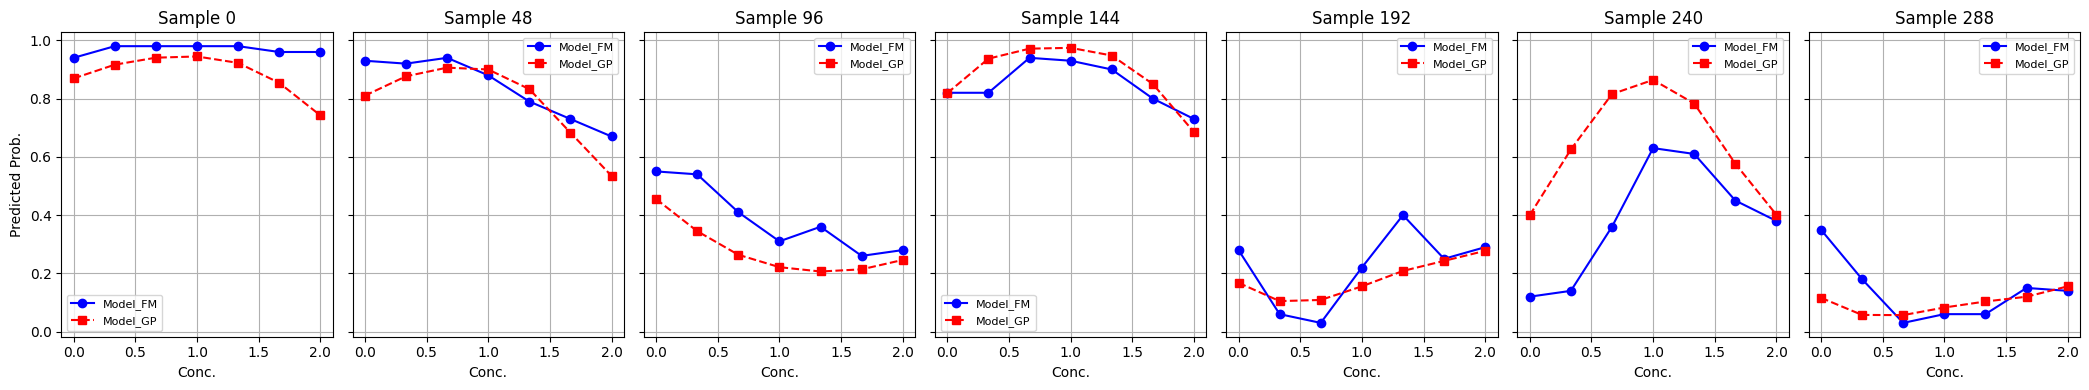

In [9]:
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 3

results, selected_indices = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_ran,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/fm4m/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.00it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 47.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 27.77it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.76it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.80it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.58it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.08it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.66it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.16it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.42it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.11it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.36it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 35.31it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 32.17it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 42.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.33it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.52it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.00it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 22.03it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.49it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 45.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.61it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 46.09it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.41it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 28.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 39.93it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.13it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.72it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 34.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.28it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 33.61it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 40.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 29.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 45.02it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 42.39it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 36.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 20.27it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 38.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 31.11it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00, 30.18it/s]


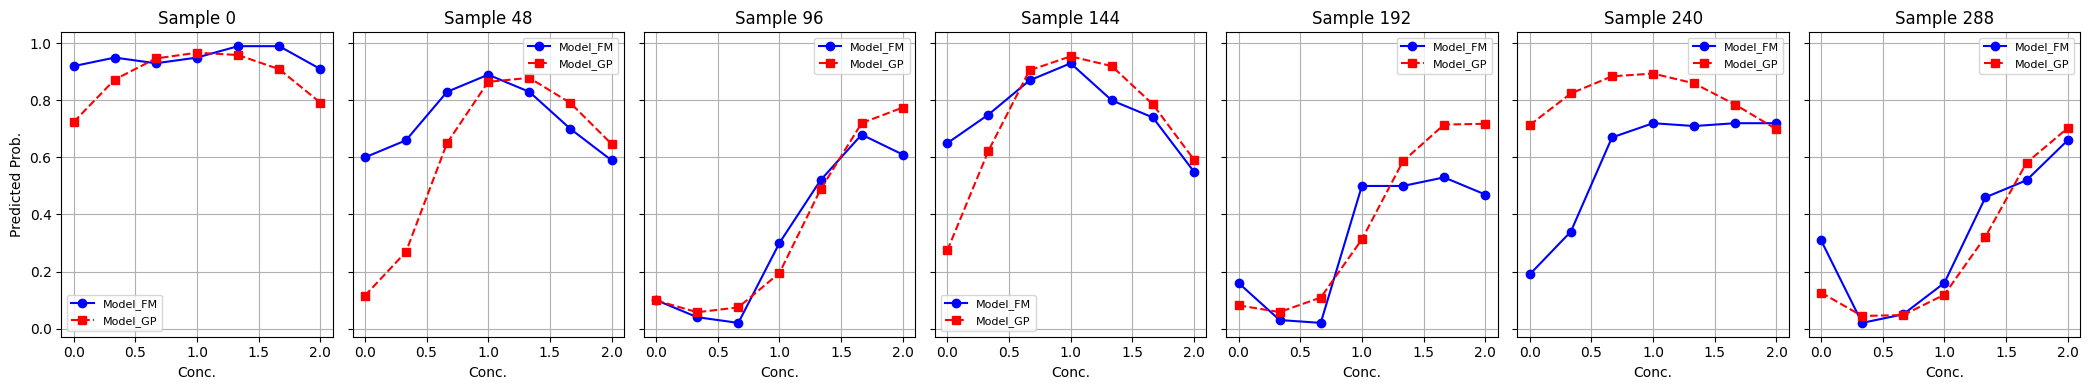

In [27]:
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 4

results0, selected_indices = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_ran,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)

In [ ]:
# Looks like random forest classifier is most similar one, let's use Randomforest classifier temporaily

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.74it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:94: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.81it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.05it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.70it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.20it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.87it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.32it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.42it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.27it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.76it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.37it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.79it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.95it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.53it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.69it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.87it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.33it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.23it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.46it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.88it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.74it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.21it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.75it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.07it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.97it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.14it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.41it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.90it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.87it/s]


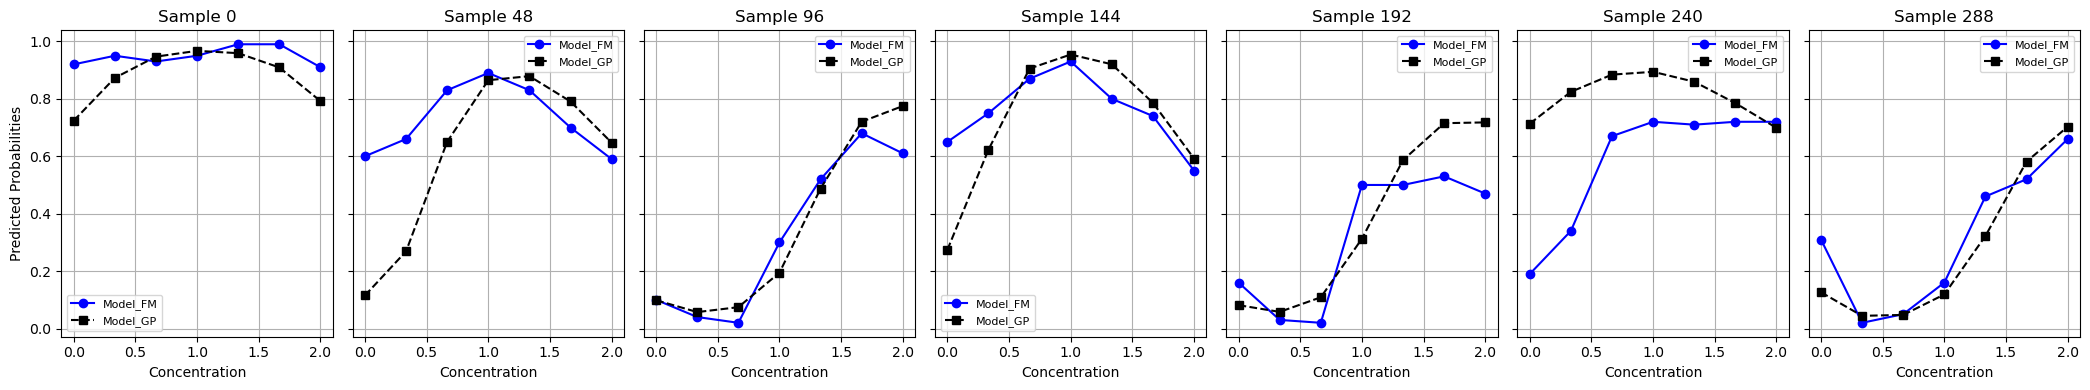

In [7]:
# Reformat plot
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
component_idx = 4

results0, selected_indices,_ = perturb_predict_compare_plot_subplots(
    df=df_structured,
    component_idx=component_idx,
    model_clf=model_clf_ran,
    model_gp=model_gp_,
    num_points=num_points,
    custom_conc_series=custom_conc,
    n_samples=7,
    step=48,
    figsize=(21, 4)
)

### Replace with new molecules

In [8]:
info_path = '../../data/Info_new_molecules.csv'
df_info = pd.read_csv(info_path)
replacement_smiles_similar = df_info['SMILES'].iloc[:5].tolist()
replacement_smiles_dissimilar = df_info['SMILES'].iloc[5:].tolist()
print(replacement_smiles_similar)
print(replacement_smiles_dissimilar)

['CCCCCCCCCC=O', 'CC(=CCC/C(=C/CO)/C)C', 'CCCCCCCCCCCCCCCC(=O)O', 'CCCC/C=C\\CCCCCCCC(=O)O', 'CCCCCCCCOC(=O)CN.Cl']
['C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)O', 'C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F', 'C(C(C(C(C(F)(F)S(=O)(=O)[O-])(F)F)(F)F)(F)F)(C(C(C(F)(F)F)(F)F)(F)F)(F)F.[K+]']


In [9]:
def replace_entire_smi_column(df, smi_column, new_smi):
    """
    Replace the entire smi_column in df with a single new SMILES.

    Parameters:
    - df: pd.DataFrame — df_structured
    - smi_column: str — column to replace (e.g., "smi3")
    - new_smi: str — SMILES string to set for the whole column

    Returns:
    - df_new: pd.DataFrame — modified copy
    """
    df_new = df.copy()

    if smi_column not in df.columns:
        raise ValueError(f"{smi_column} not found in DataFrame columns.")
    
    df_new[smi_column] = new_smi

    return df_new

In [10]:
df_new1 = replace_entire_smi_column(
    df=df_structured,
    smi_column='smi4',
    new_smi=replacement_smiles_similar[0]   
)

df_new2 = replace_entire_smi_column(
    df=df_structured,
    smi_column='smi4',
    new_smi=replacement_smiles_dissimilar[0]   
)

In [11]:
n_samples=7
step=48
component_idx=4
min_conc = 0
max_conc = 2
num_points = 7
custom_conc = np.linspace(min_conc, max_conc, num_points)
selected_indices = [i * step for i in range(n_samples)]

In [12]:
results1 = perturb_and_embed(
        df=df_new1, 
        row_indices=selected_indices, 
        component_idx=component_idx, 
        num_points=num_points, 
        custom_conc_series=custom_conc
    )

results2 = perturb_and_embed(
        df=df_new2, 
        row_indices=selected_indices, 
        component_idx=component_idx, 
        num_points=num_points, 
        custom_conc_series=custom_conc
    )

Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.72it/s]
/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/notebooks/../src/Concentration.py:94: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train_emb = train_df.applymap(lambda x: replace_with_list(x, train_dict))


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.31it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.69it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.13it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:00<00:00,  7.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.70it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.35it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.89it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.03it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.19it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.72it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.45it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.07it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.87it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.15it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.20it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.81it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.32it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.67it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.65it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.63it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.40it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.62it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.55it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.71it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.10it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.85it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.72it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.83it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.86it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.06it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.82it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.78it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.18it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.83it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.81it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.80it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.20it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.54it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.14it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.26it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.88it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.98it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.51it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.90it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.17it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.16it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.60it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.23it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.16it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.74it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.24it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.44it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.75it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.90it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.35it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.01it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.34it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.83it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.00it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.47it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.04it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.25it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.91it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.32it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.06it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.38it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.94it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.41it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  4.57it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  5.59it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


Random Seed: 12345
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Vocab size: 2393
[INFERENCE MODE - smi-ted-Light]


100%|██████████| 7/7 [00:01<00:00,  3.82it/s]


In [16]:
import joblib

# Save
joblib.dump(results0, "results0_20250904.pkl")
joblib.dump(results1, "results1_20250904.pkl")
joblib.dump(results2, "results2_20250904.pkl")

# Later, load
# results0_loaded = joblib.load("results0.pkl")
# results1_loaded = joblib.load("results1.pkl")
# results2_loaded = joblib.load("results2.pkl")

['results2_20250904.pkl']

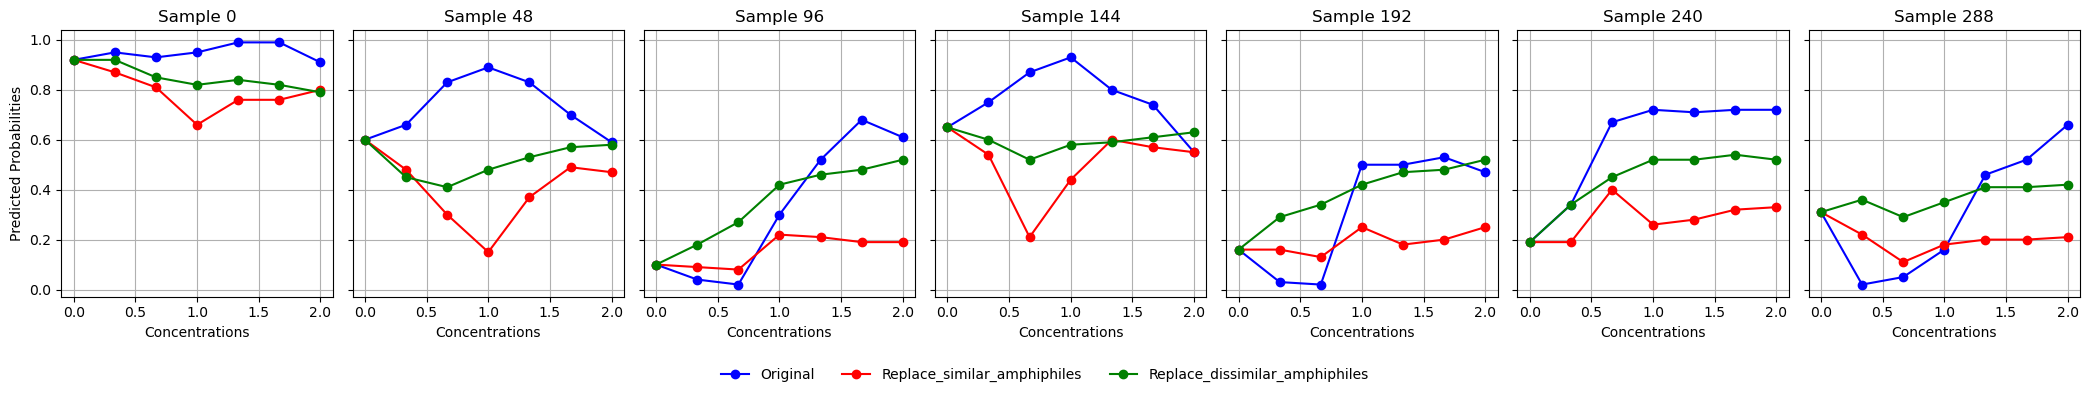

In [6]:
results_list = [results0, results1[0], results2[0]]
labels = ['Original', 'Replace_similar_amphiphiles', 'Replace_dissimilar_amphiphiles']
selected_indices = [0, 48, 96, 144, 192, 240, 288]  # same indices used in your original runs
custom_conc = np.linspace(0, 2, 7)

compare_results_multiple_runs(
    results_list=results_list,
    model_clf=model_clf_ran,
    selected_indices=selected_indices,
    custom_conc_series=custom_conc,
    labels=labels,
    legend_loc='bottom'
)

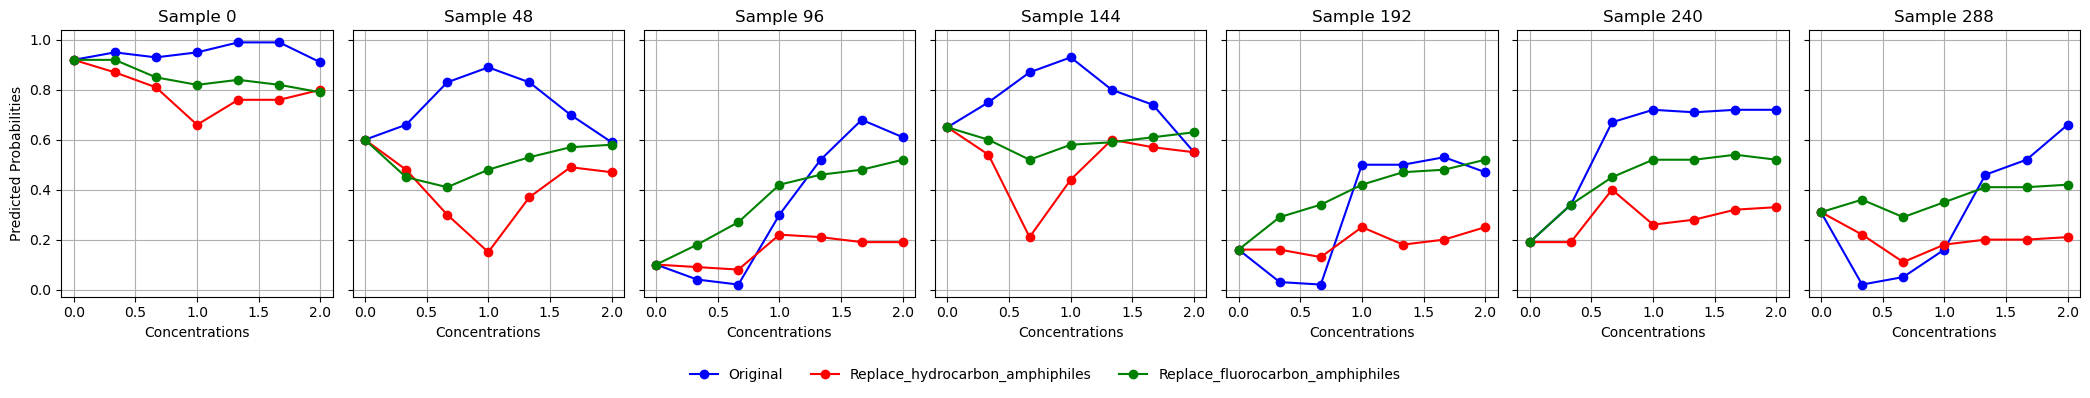

In [6]:
# Reformat plot
# Rename legend
results_list = [results0, results1[0], results2[0]]
labels = ['Original', 'Replace_hydrocarbon_amphiphiles', 'Replace_fluorocarbon_amphiphiles']
selected_indices = [0, 48, 96, 144, 192, 240, 288]  # same indices used in your original runs
custom_conc = np.linspace(0, 2, 7)

compare_results_multiple_runs(
    results_list=results_list,
    model_clf=model_clf_ran,
    selected_indices=selected_indices,
    custom_conc_series=custom_conc,
    labels=labels,
    legend_loc='bottom'
)